## Intro

This notebook tests the elastic net module built in Python and the utils capabilities found in the EnetUtils module. It is parallelized with dask and requries it.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import ElasticNet as enet

In [3]:
import sys
sys.path.insert(0, '../')

In [4]:
# import ElasticNet_Ada as enet

import ElasticNet as enet
import EnetUtilsParallel as euP

In [5]:
from sklearn.datasets import load_boston

In [6]:
# help(load_boston)
X, y = load_boston(return_X_y=True)

### Gaussian


Wall time: 1.14 s


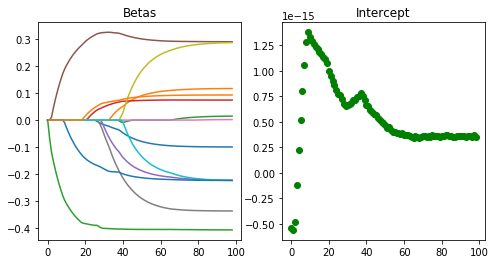

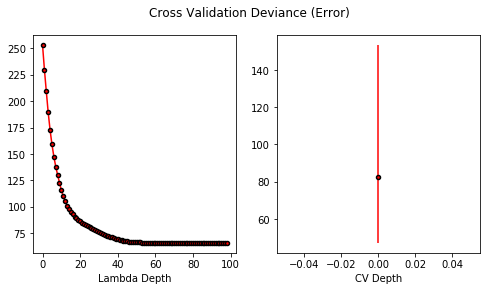

In [9]:
%%time
mod = enet.ElasticNet(X, y, offset=None, alpha=0.99, depth=99, tol=1e-4, fam='Gauss',
                      x_std=True, y_std=True, random_state=123
#                       warm_start=True
                     )

mod.fit()
_ = euP.path_plot(mod.B, mod.B0, figsize=(8,4))
_ = euP.err_plot(mod.model_errors.T, figsize=(8,4))

In [10]:
mod.model_errors.shape

(99, 1)

In [11]:
%%time
mod2 = enet.ElasticNet(X, y, offset=None, alpha=0.99, depth=99, tol=1e-4, fam='Gauss',
                      x_std=True, y_std=True,
                     )

mod2.fit()
# _ = path_plot(mod.B, mod.B0, figsize=(6,4))
# _ = err_plot(mod.model_errors, figsize=(6,4))

Wall time: 1.07 s


### Parallel CV Trials

In [12]:
%%time
cv = euP.CrossVal(mod, cv_its=8, n_ahead=4)
cv.fit_cv()

In Cross Validation #
6 1 4 8 3 5 7 2 Not Sorted
Sorted :
[1, 2, 3, 4, 5, 6, 7, 8]
Wall time: 29.8 s


In [13]:
print("min index = ", cv.min_cvlam_idx, " ---  shape lams = ", cv.lams.shape, " ---  shape model errors = ", cv.model_errors.shape)
# print(cv.min_ce_idx_note)
print(cv.B.shape)

min index =  3  ---  shape lams =  (101,)  ---  shape model errors =  (8, 99)
(8, 13, 99)


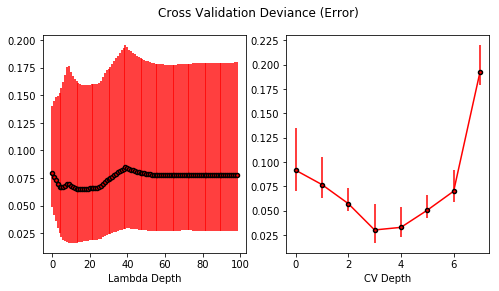

In [14]:
_ = euP.err_plot(cv.model_errors, figsize=(8,4))

In [15]:
print(np.where(cv.model_errors == np.nanmin(cv.model_errors)))
print(np.nanmin(cv.model_errors))

(array([3], dtype=int64), array([25], dtype=int64))
0.0188239904252


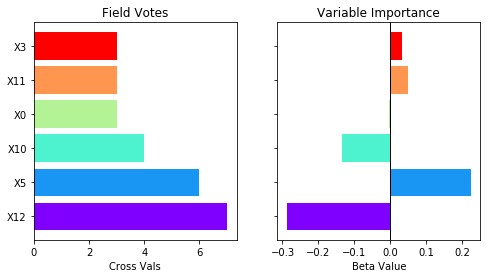

In [16]:
_ = euP.field_vote_plot(cv.B, cv.min_cvlam_idx, cv.param_nm, cv.min_indices, figsize=(8,4))

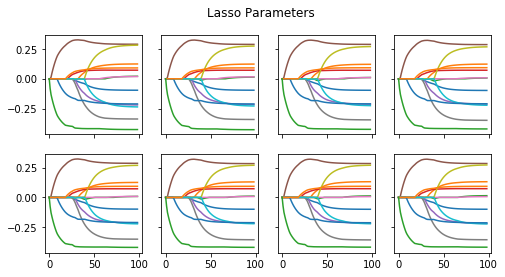

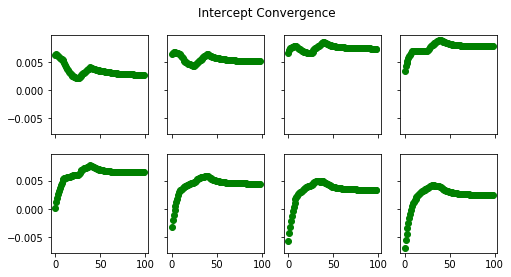

In [17]:
_ = euP.path_plot(cv.B, cv.B0, figsize=(8,4))

### NegBin

In [18]:
# help(np.random.negative_binomial)

In [19]:
ynb = np.random.negative_binomial(n=3,p=0.9,size=y.shape)

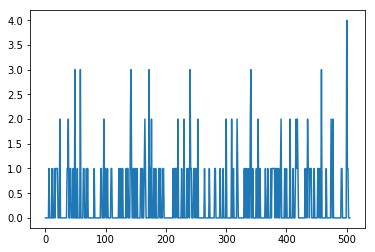

In [20]:
plt.plot(ynb);

Wall time: 1.92 s


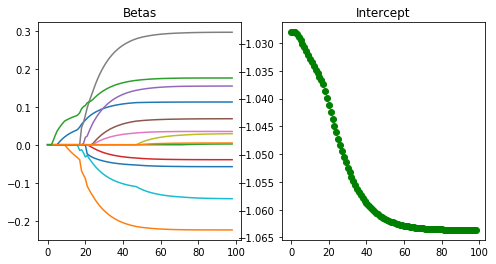

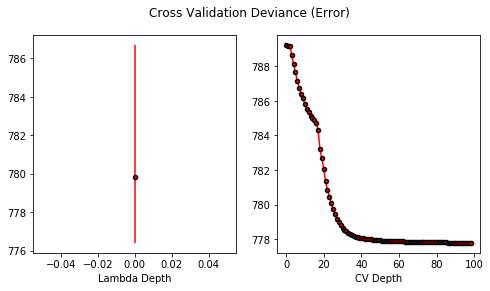

In [21]:
%%time
mod = enet.ElasticNet(X, ynb.reshape(-1,1), offset=None, alpha=0.99, depth=99, tol=1e-4, fam='NegBin',
                      x_std=True, y_std=False,
                      #warm_start=True
                     )

mod.fit()
_ = euP.path_plot(mod.B, mod.B0, figsize=(8,4))
_ = euP.err_plot(mod.model_errors, figsize=(8,4))

In [22]:
%%time
mod2 = enet.ElasticNet(X, ynb.reshape(-1,1), offset=None, alpha=0.99, depth=99, tol=1e-4, fam='NegBin',
                      x_std=True, y_std=False,
                      #warm_start=False
                     )

mod2.fit()
# _ = path_plot(mod.B, mod.B0, figsize=(6,4))
# _ = err_plot(mod.model_errors, figsize=(6,4))

Wall time: 1.9 s


In [23]:
%%time
cv = euP.CrossVal(mod, cv_its=8, n_ahead=4)
cv.fit_cv()

In Cross Validation #
2 6 1 7 8 3 5 4 Not Sorted
Sorted :
[1, 2, 3, 4, 5, 6, 7, 8]
Wall time: 37.7 s


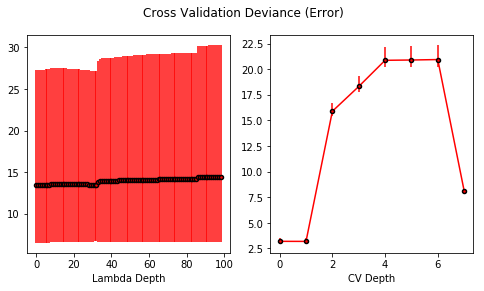

In [24]:
_ = euP.err_plot(cv.model_errors, figsize=(8,4))

In [25]:
print(np.where(cv.model_errors == np.nanmin(cv.model_errors)))
print(np.nanmin(cv.model_errors))

(array([1], dtype=int64), array([87], dtype=int64))
2.98201750984


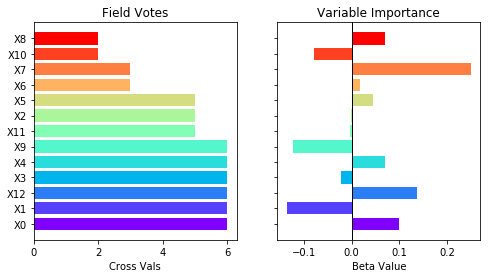

In [26]:
_ = euP.field_vote_plot(cv.B, cv.min_cvlam_idx, cv.param_nm, cv.min_indices, figsize=(8,4))

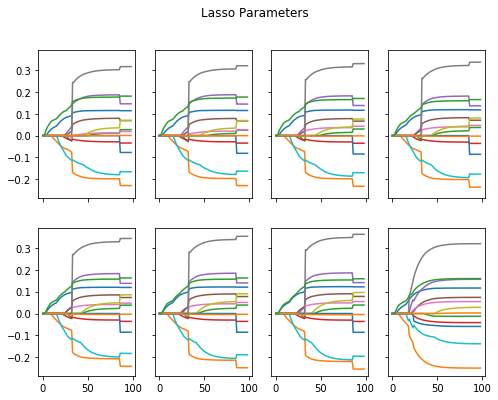

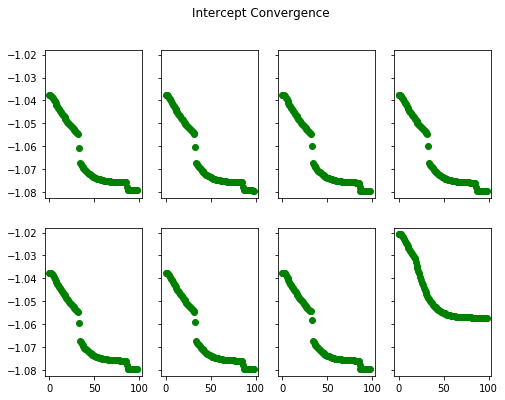

In [27]:
_ = euP.path_plot(cv.B, cv.B0, figsize=(8,6))